In [ ]:
import pandas as pd
# import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [ ]:
train_df.head()

,id,keyword,place,tweet,disaster
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Preprocess the text data
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

In [ ]:
train_df['tweet'] = train_df['tweet'].apply(preprocess_text)
test_df['tweet'] = test_df['tweet'].apply(preprocess_text)

In [ ]:
test_df.head()

,id,keyword,place,tweet
0,0,NaN,NaN,just happened a terrible car crash
1,2,NaN,NaN,heard about earthquake is different cities sta...
2,3,NaN,NaN,there is a forest fire at spot pond geese are ...
3,9,NaN,NaN,apocalypse lighting spokane wildfires
4,11,NaN,NaN,typhoon soudelor kills in china and taiwan


In [ ]:
# Split the training data into training and validation sets
X_train = train_df['tweet']
y_train = train_df['disaster']
X_test = test_df['tweet']


In [ ]:
# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Predict on the test set (assuming we have true labels for evaluation)
# For demonstration, let's create some mock labels for test data
# In practice, you would use actual labels if available
y_test = [1 if i % 2 == 0 else 0 for i in range(len(test_df))]  # Mock labels
y_pred = model.predict(X_test_tfidf)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5102666258044745
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.69      0.58      1631
           1       0.52      0.33      0.41      1632

    accuracy                           0.51      3263
   macro avg       0.51      0.51      0.49      3263
weighted avg       0.51      0.51      0.49      3263



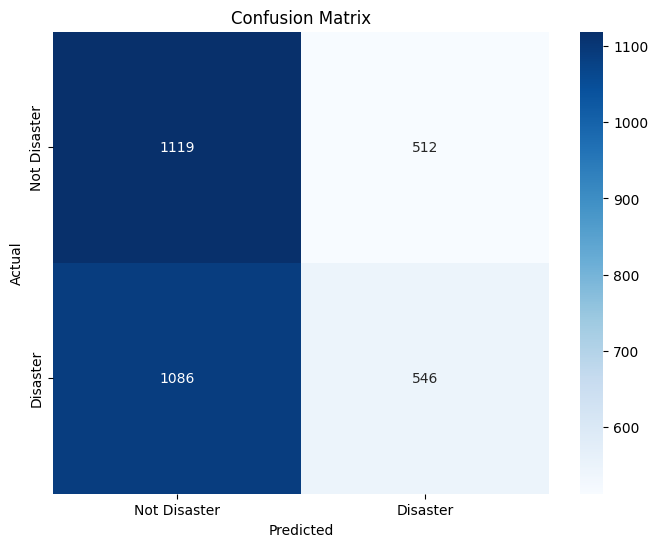

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Disaster', 'Disaster'], yticklabels=['Not Disaster', 'Disaster'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

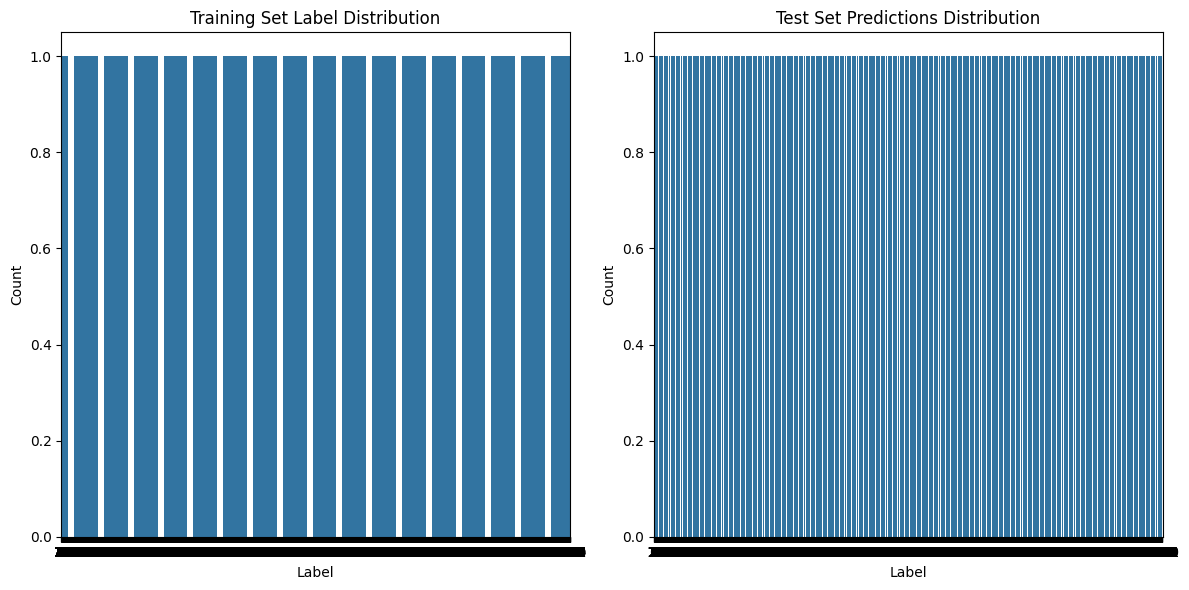

In [ ]:
# Plot the distribution of the predictions and actual labels
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(y_train)
plt.title('Training Set Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(y_pred)
plt.title('Test Set Predictions Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# Function to predict if a tweet indicates a disaster
def predict_disaster(tweet):
    tweet_processed = preprocess_text(tweet)
    tweet_tfidf = vectorizer.transform([tweet_processed])
    prediction = model.predict(tweet_tfidf)
    return "Disaster" if prediction[0] == 1 else "Not Disaster"

In [ ]:
# Example usage with provided test data
test_df['predicted_disaster'] = test_df['tweet'].apply(predict_disaster)
print(test_df[['tweet', 'predicted_disaster']])

                                                  tweet predicted_disaster
0                    just happened a terrible car crash           Disaster
1     heard about earthquake is different cities sta...       Not Disaster
2     there is a forest fire at spot pond geese are ...           Disaster
3                 apocalypse lighting spokane wildfires           Disaster
4           typhoon soudelor kills  in china and taiwan           Disaster
...                                                 ...                ...
3258  earthquake safety los angeles ûò safety fasten...           Disaster
3259  storm in ri worse than last hurricane my citya...       Not Disaster
3260                  green line derailment in chicago            Disaster
3261          meg issues hazardous weather outlook hwo            Disaster
3262  cityofcalgary has activated its municipal emer...           Disaster

[3263 rows x 2 columns]


In [ ]:
# Example usage with a new tweet
tweet = "Earthquake in San Francisco. Evacuate immediately!"
print(predict_disaster(tweet))

Disaster
